The **Kernel Method for Regularized Least Squares Fitting** can be summarized using the following equations, as described in the referenced PDF:

1. **Regularized Least Squares Objective**:
   The goal is to minimize the regularized least squares objective:
   $$
   \min_{\mathbf{w}} \frac{1}{2} \|\mathbf{y} - \mathbf{X}\mathbf{w}\|_2^2 + \frac{\lambda}{2} \|\mathbf{w}\|_2^2,
   $$
   where:
   - $$\mathbf{X} \in \mathbb{R}^{n \times d}$$ is the feature matrix,
   - $$\mathbf{y} \in \mathbb{R}^n$$ is the target vector,
   - $$\mathbf{w} \in \mathbb{R}^d$$ is the weight vector,
   - $$\lambda > 0$$ is the regularization parameter.

2. **Kernel Trick**:
   By expressing the solution in terms of the kernel function, we rewrite it as:
   $$
   f(\mathbf{x}) = \sum_{i=1}^n \alpha_i k(\mathbf{x}, \mathbf{x}_i),
   $$
   where:
   - $$k(\mathbf{x}, \mathbf{x}_i)$$ is the kernel function (e.g., RBF, polynomial),
   - $$\alpha_i$$ are coefficients to be determined.

3. **Dual Formulation**:
   The coefficients are obtained by solving:
   $$
   (\mathbf{K} + \lambda \mathbf{I})\boldsymbol{\alpha} = \mathbf{y},
   $$
   where:
   - $$\mathbf{K} = [k(\mathbf{x}_i, \mathbf{x}_j)]_{i,j=1}^n$$ is the kernel matrix,
   - $$\boldsymbol{\alpha} = [\alpha_1, ..., \alpha_n]^\top$$.

4. **Prediction**:
   For a new input point $$\mathbf{x}_*$$, the prediction is given by:
   $$
   f(\mathbf{x}_*) = \sum_{i=1}^n \alpha_i k(\mathbf{x}_*, \mathbf{x}_i).
   $$

These equations encapsulate how kernel methods transform data into a higher-dimensional space implicitly through the kernel function, allowing for nonlinear regression while maintaining computational efficiency.

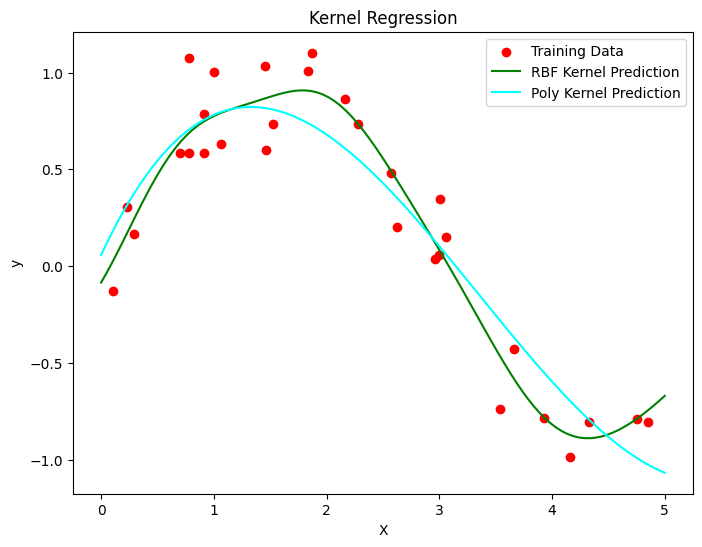

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Kernel Ridge Regression class
class KernelRidgeRegression:
    def __init__(self, kernel='rbf', gamma=1.0, alpha=1.0):
        """
        Initialize the Kernel Ridge Regression model.
        
        Parameters:
        - kernel: Type of kernel ('rbf', 'polynomial', or 'linear').
        - gamma: Parameter for RBF kernel.
        - degree: Degree for polynomial kernel.
        - coef0: Coefficient for polynomial kernel.
        - alpha: Regularization parameter (lambda).
        """
        self.kernel = kernel
        self.alpha = alpha
    
    def _rbf_kernel(self, X1, X2, gamma=1.0):
        """Compute the RBF (Gaussian) kernel."""
        sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1)[None, :] - 2 * np.dot(X1, X2.T)
        return np.exp(-gamma * sq_dists)

    def _polynomial_kernel(self, X1, X2, degree=3):
        """Compute the polynomial kernel."""
        return (np.dot(X1, X2.T) + 1.0) ** degree

    def _linear_kernel(self, X1, X2):
        """Compute the linear kernel."""
        return np.dot(X1, X2.T)

    def fit(self, X_train, b):
        """
        Fit the model to the training data.
        
        Parameters:
        - X_train: Training features (n x d).
        - b (Y_train): Training labels (n x 1).
        """
        self.X_train = X_train
        self.b = b
        
        # Compute the Kernel matrix K
        if self.kernel == 'rbf':
            self.K = self._rbf_kernel(X_train, X_train)
        elif self.kernel == 'polynomial':
            self.K = self._polynomial_kernel(X_train, X_train)
        elif self.kernel == 'linear':
            self.K = self._linear_kernel(X_train, X_train)
        else:
            raise ValueError("Unsupported kernel type.")
        
        # Solve the regularized least squares problem
        n = len(X_train)
        self.what = np.linalg.solve(self.K + self.alpha * np.eye(n), b)
    
    def predict(self, X_test):
        """
        Predict using the trained model.
        
        Parameters:
        - X_test: Test features (m x d).
        
        Returns:
        - Predictions (m x 1).
        """
        if self.kernel == 'rbf':
            K_test = self._rbf_kernel(X_test, self.X_train)
        elif self.kernel == 'polynomial':
            K_test = self._polynomial_kernel(X_test, self.X_train)
        elif self.kernel == 'linear':
            K_test = self._linear_kernel(X_test, self.X_train)
        else:
            raise ValueError("Unsupported kernel type.")
        
        return np.dot(K_test, self.what)

# Generate synthetic data
np.random.seed(42)
n_samples = 30
X_train = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.2, n_samples)
idx_train = 29

# Fit Kernel Ridge Regression model with RBF kernel
model_rbf = KernelRidgeRegression(kernel='rbf', gamma=1.0, alpha=0.1)
model_rbf.fit(X_train, y_train)

# Predict on test data and plot results
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred_rbf = model_rbf.predict(X_plot)

# Fit Kernel Ridge Regression model with RBF kernel
model_poly = KernelRidgeRegression(kernel='polynomial')
model_poly.fit(X_train, y_train)

# Predict on test data and plot results
y_pred_poly = model_poly.predict(X_plot)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_plot, y_pred_rbf, color='green', label='RBF Kernel Prediction')
plt.plot(X_plot, y_pred_poly, color='cyan', label='Poly Kernel Prediction')
plt.title("Kernel Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
